# 1.数据的批量读取

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
#tensorflow提供的数据集的读取方法
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [3]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


为什么要采用one-hot(读热码)编码？

1.将离散特征的取值扩展到欧式空间，离散特征的某个取值就对应欧式空间的某个点。

2.机器学习算法中，特征之间的距离的计算或相识度的常用计算方法都是基于欧式空间的。

3.将离散特征使用one-hot编码会让特征之间的距离计算更加合理。

In [4]:
print('训练集数量：',mnist.train.num_examples,'验证集数量：',mnist.validation.num_examples,
     '测试集数量：',mnist.test.num_examples)

训练集数量： 55000 验证集数量： 5000 测试集数量： 10000


In [5]:
print('train images shape:',mnist.train.images.shape,'labels shape:',mnist.train.labels.shape)

train images shape: (55000, 784) labels shape: (55000, 10)


In [6]:
#看具体一副image的数据
mnist.train.images[0]
# mnist.train.images[0].reshape(28,28)#一维数组转为矩阵（二维）*****reshape（）行优先，逐行排列

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [7]:
#可视化image
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
#     plt.imshow(image.reshape(14,56),cmap='binary')
    plt.show()

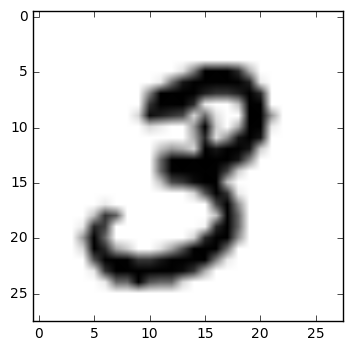

In [8]:
# plot_image(mnist.train.images[1])
plot_image(mnist.train.images[1])

In [9]:
mnist.train.labels[1]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [10]:
np.argmax(mnist.train.labels[1])#!!!!!!!!!!argmax返回的是最大数的索引

3

In [11]:
batch_images_xs,batch_labels_ys=mnist.train.next_batch(batch_size=10)#next_batch()实现内部会对数据集先做shuffle
print(mnist.train.labels[0:10])

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


# 2.模型构建

In [12]:
#定义待输入数据的占位符 
x=tf.placeholder(tf.float32,[None,784],name="X")
y=tf.placeholder(tf.float32,[None,10],name="Y")

In [13]:
#定义变量
W=tf.Variable(tf.random_normal([784,10],stddev=0.01),name='W')
b=tf.Variable(tf.zeros([10]),name='b')

In [14]:
#定义前向计算
forward=tf.matmul(x,W)+b

In [15]:
#结果分类softmax将二分类延伸到多分类
pred=tf.nn.softmax(forward)

逻辑回归中的损失函数为什么采用交叉熵对数损失函数而不采用均方损失函数？

1.如果用均方loss_function,把Sigmoid函数带入J(w),会得到一个非凸函数，有多个极小值，如果采用梯度下降法，会容易导致陷入局部最优解中。

2.采用交叉熵对数loss_function,是一个凸函数，交叉熵刻画的是两个概率分布之间的距离，交叉熵越小，两个概率的分布越接近。

# 3.模型训练

In [16]:
train_epochs=50 #训练轮数
batch_size=100#单次训练样本的大小
total_batch=int(mnist.train.num_examples/batch_size)#每轮训练多少批次
learning_rate=0.01 #学习率
display_step=1#显示粒度

In [17]:
#定义交叉熵损失函数
loss_function=tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))
#选择优化器
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [18]:
#定义准确率
correct_prediction=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))#得到一个bool值
#将bool值转化为浮点数，并计算平均值
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [ ]:
'''
#a=np.array([0,0,1,0])
#b=tf.argmax(a)#####a为一维数组
a=np.array([[0,0,1,0]])
a=[[0,0,1,0]]
b=tf.argmax(a,1)######a为多维数组
print(a)
with tf.Session() as sess:
    print(b.eval())
'''

In [20]:
#声明会话，初始化变量
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

In [21]:
#开始训练
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs,ys = mnist.train.next_batch(batch_size)#读取批次数据
        sess.run(optimizer,feed_dict={x:xs,y:ys})
        
    #使用验证集数据计算误差和准确率，验证集没有分批    
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
    #打印训练过程中的详细信息
    if (epoch+1) % display_step ==0:
        print("Train epoch:",'%02d'%(epoch+1),'Loss=','{:.9f}'.format(loss),\
             'Accuracy=','{:.4f}'.format(acc))
print("Train Finished!")

Train epoch: 01 Loss= 0.753077447 Accuracy= 0.8496
Train epoch: 02 Loss= 0.573170602 Accuracy= 0.8700
Train epoch: 03 Loss= 0.500237346 Accuracy= 0.8788
Train epoch: 04 Loss= 0.458722502 Accuracy= 0.8854
Train epoch: 05 Loss= 0.431586683 Accuracy= 0.8888
Train epoch: 06 Loss= 0.411714643 Accuracy= 0.8924
Train epoch: 07 Loss= 0.396913141 Accuracy= 0.8952
Train epoch: 08 Loss= 0.384905487 Accuracy= 0.8978
Train epoch: 09 Loss= 0.375093967 Accuracy= 0.8990
Train epoch: 10 Loss= 0.367252678 Accuracy= 0.9002
Train epoch: 11 Loss= 0.360015064 Accuracy= 0.9024
Train epoch: 12 Loss= 0.354011536 Accuracy= 0.9028
Train epoch: 13 Loss= 0.348862439 Accuracy= 0.9062
Train epoch: 14 Loss= 0.344141960 Accuracy= 0.9072
Train epoch: 15 Loss= 0.340239853 Accuracy= 0.9082
Train epoch: 16 Loss= 0.336047947 Accuracy= 0.9092
Train epoch: 17 Loss= 0.332715005 Accuracy= 0.9102
Train epoch: 18 Loss= 0.329703093 Accuracy= 0.9114
Train epoch: 19 Loss= 0.327087998 Accuracy= 0.9114
Train epoch: 20 Loss= 0.3243293

# 4.模型评估与应用

In [22]:
#完成训练后，在测试集上评估模型的准确率
accu_test=sess.run(accuracy,
                        feed_dict={x:mnist.test.images,y:mnist.test.labels})
print("Test Accuracy:",accu_test)

Test Accuracy: 0.9195


In [23]:
#由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字
prediction_result=sess.run(tf.argmax(pred,1),feed_dict={x:mnist.test.images})
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [30]:
#定义可视化函数
def plot_image_labels_prediction(images,#图像列表
                                labels,#标签列表
                                prediction,#预测值列表
                                index,#从第index个图像开始显示
                                num=10):#缺省一次显示10幅
    fig=plt.gcf()   #获取当前图标，Get Current Figure
    fig.set_size_inches(10,12)  #1英寸=2.54cm
    if num>25:
        num=25         #最多显示25个子图
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(np.reshape(images[index],(28,28)),cmap='binary' )#显示第index个图像
        title='label='+str(np.argmax(labels[index]))#构建该图上要显示的title信息
        if len(prediction)>0:
            title+=',predict'+str(prediction[index])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])#不显示坐标轴
        ax.set_yticks([])
        index+=1
    plt.show()
        

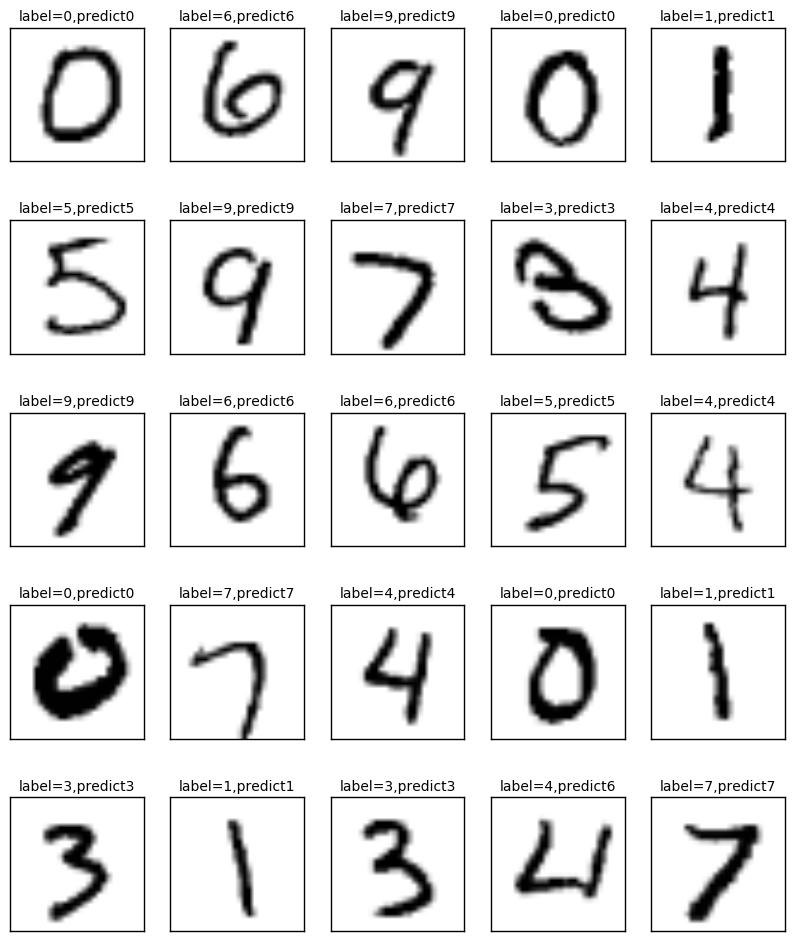

In [32]:
plot_image_labels_prediction(mnist.test.images,
                             mnist.test.labels,
                             prediction_result,
                                10,
                                30)